<a href="https://colab.research.google.com/github/Vaishnav-Ramkrishna-Borse/IIT-Jodhpur-Internship-Project/blob/main/Project_1_AI_Jodhpur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# @title Load the imports

# from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 20
pd.options.display.float_format = "{:.5f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")


Imported the modules.


In [ ]:
# Importing dataset
data = pd.read_csv(filepath_or_buffer="https://docs.google.com/spreadsheets/d/e/2PACX-1vT0-WuWQVLuTcEAAZsTyXBYKVgYjJ69vygR3Ckf80-QM_8SXFEUnW_M60jg_lChEA/pub?gid=118442495&single=true&output=csv")
data.head()

,Unnamed: 0,Position,Position.1,Position.2,4,5,6,Velocity,Velocity.1,Velocity.2,...,Acceleration.2,Acceleration.3,Acceleration.4,Acceleration.5,Torque,Torque.1,Torque.2,22,23,24
0,Time,Ankle,Knee,Hip,Shoulder,Elbow,Pelvis,Ankle,Knee,Hip,...,Hip,Shoulder,Elbow,Pelvis,Ankle,Knee,Hip,Shoulder,Elbow,Pelvis
1,4.816763,-0.2391852855,0.8704949246,0.480432195,0.0788975351,0.1235488322,0.07370575132,-0.2630364044,0.9603390386,1.081619779,...,-7.189737631,-2.861067729,1.711416834,0.5635331449,-0.5064310878,-1.124603784,9.772712366,0.9145042656,0.5059999352,5.018541881
2,4.83343,-0.2436232167,0.8823391165,0.4975035443,0.07570161705,0.1323901492,0.0775947353,-0.2548449941,0.4619670996,0.9694577448,...,-6.269437264,-1.391712167,-0.7054235308,0.08415479112,-0.4951243794,-1.43648108,10.88899387,0.970140401,0.5180211617,5.02382375
3,4.850097,-0.2472402251,0.8859738514,0.5128255724,0.07212888279,0.1410089593,0.08180331072,-0.1674436521,-0.0220564067,0.8712407637,...,-5.516364747,0.2877009869,-3.695679881,-0.4588991222,-0.4949835975,-1.590367242,11.93088797,1.008010741,0.5203933368,5.011932828
4,4.866764,-0.2488825701,0.8817681579,0.5266058667,0.06863325651,0.1485915485,0.08613636833,-0.02204510402,-0.4765116976,0.7838924282,...,-4.965225878,1.906097858,-6.893332182,-0.8944395677,-0.5025215412,-1.567813938,12.76442382,1.019894971,0.5116659343,4.99477229


In [ ]:
data = data.drop(index=0)
# data = tf.convert_to_tensor(data, dtype=tf.float32)
data = np.asarray(data).astype(np.float32)
data = pd.DataFrame(data)
data.rename(columns={4: 'x1', 10: 'x2', 16: 'x3', 5: 'x4', 11: 'x5',
                     17: 'x6', 6: 'x7', 12: 'x8', 18: 'x9', 22: 'y1',
                     23: 'y2', 24: 'y3'}, inplace=True)
# data.rename(columns={4: 'x1', 5: 'x4', 6: 'x7', 22: 'y1',
#                      23: 'y2', 24: 'y3'}, inplace=True)
data.head()

,0,1,2,3,x1,x4,x7,7,8,9,...,15,x3,x6,x9,19,20,21,y1,y2,y3
0,4.81676,-0.23919,0.87049,0.48043,0.07890,0.12355,0.07371,-0.26304,0.96034,1.08162,...,-7.18974,-2.86107,1.71142,0.56353,-0.50643,-1.12460,9.77271,0.91450,0.50600,5.01854
1,4.83343,-0.24362,0.88234,0.49750,0.07570,0.13239,0.07759,-0.25484,0.46197,0.96946,...,-6.26944,-1.39171,-0.70542,0.08415,-0.49512,-1.43648,10.88899,0.97014,0.51802,5.02382
2,4.85010,-0.24724,0.88597,0.51283,0.07213,0.14101,0.08180,-0.16744,-0.02206,0.87124,...,-5.51636,0.28770,-3.69568,-0.45890,-0.49498,-1.59037,11.93089,1.00801,0.52039,5.01193
3,4.86676,-0.24888,0.88177,0.52661,0.06863,0.14859,0.08614,-0.02205,-0.47651,0.78389,...,-4.96523,1.90610,-6.89333,-0.89444,-0.50252,-1.56781,12.76442,1.01989,0.51167,4.99477
4,4.88343,-0.24779,0.87032,0.53900,0.06565,0.15427,0.09041,0.15608,-0.88926,0.70379,...,-4.64718,3.22700,-9.80755,-1.14416,-0.51289,-1.37730,13.27528,1.00571,0.49394,4.96043


In [ ]:
data['x1*x4'] = data['x1']*data['x4']
data['x1*x7'] = data['x1']*data['x7']
data['x4*x7'] = data['x4']*data['x7']

In [ ]:
df = pd.DataFrame()
df['x1'] = data['x1']
df['x2'] = data['x2']
df['x3'] = data['x3']
df['x4'] = data['x4']
df['x5'] = data['x5']
df['x6'] = data['x6']
df['x7'] = data['x7']
df['x8'] = data['x8']
df['x9'] = data['x9']
df['y1'] = data['y1']
df['y2'] = data['y2']
df['y3'] = data['y3']
df['x1_x4'] = data['x1*x4']
df['x1_x7'] = data['x1*x7']
df['x4_x7'] = data['x4*x7']
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y1,y2,y3,x1_x4,x1_x7,x4_x7
0,0.07890,-0.17199,-2.86107,0.12355,0.52292,1.71142,0.07371,-0.03443,0.56353,0.91450,0.50600,5.01854,0.00975,0.00582,0.00911
1,0.07570,-0.20743,-1.39171,0.13239,0.53130,-0.70542,0.07759,-0.02903,0.08415,0.97014,0.51802,5.02382,0.01002,0.00587,0.01027
2,0.07213,-0.21663,0.28770,0.14101,0.49463,-3.69568,0.08180,-0.03216,-0.45890,1.00801,0.52039,5.01193,0.01017,0.00590,0.01154
3,0.06863,-0.19835,1.90610,0.14859,0.40638,-6.89333,0.08614,-0.04344,-0.89444,1.01989,0.51167,4.99477,0.01020,0.00591,0.01280
4,0.06565,-0.15557,3.22700,0.15427,0.26721,-9.80755,0.09041,-0.06043,-1.14416,1.00571,0.49394,4.96043,0.01013,0.00594,0.01395


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      908 non-null    float32
 1   x2      908 non-null    float32
 2   x3      908 non-null    float32
 3   x4      908 non-null    float32
 4   x5      908 non-null    float32
 5   x6      908 non-null    float32
 6   x7      908 non-null    float32
 7   x8      908 non-null    float32
 8   x9      908 non-null    float32
 9   y1      908 non-null    float32
 10  y2      908 non-null    float32
 11  y3      908 non-null    float32
 12  x1_x4   908 non-null    float32
 13  x1_x7   908 non-null    float32
 14  x4_x7   908 non-null    float32
dtypes: float32(15)
memory usage: 53.3 KB


In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y1,y2,y3,x1_x4,x1_x7,x4_x7
count,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000,908.00000
mean,0.27272,0.03930,0.00653,1.04741,0.02777,-0.02241,0.13783,-0.02144,0.00149,13.79143,16.43107,-5.43688,0.15858,0.14137,0.05099
std,0.35280,0.62306,4.95112,0.63953,0.63594,5.81423,0.31923,0.30117,2.29342,11.52024,11.02990,19.21836,0.19118,0.30781,0.23559
min,-0.00324,-2.41667,-32.12979,-0.02394,-2.12831,-22.72807,-0.12451,-1.40457,-7.21099,-8.94657,-0.22634,-80.20425,-0.00473,-0.01085,-0.19264
25%,0.04618,-0.20459,-2.89468,0.24923,-0.17195,-2.12929,-0.06312,-0.09735,-1.10545,0.60726,0.65708,-5.21098,0.04728,-0.00303,-0.09895
50%,0.08289,0.03592,0.41256,1.52507,-0.02969,-0.11544,-0.00430,-0.00590,0.12704,20.32383,23.93191,0.27981,0.10287,-0.00017,-0.00018
75%,0.36951,0.29579,3.25786,1.57457,0.14214,1.74206,0.15498,0.06708,1.13926,24.28464,25.37699,4.89934,0.17541,0.04632,0.11560
max,1.29459,2.64880,12.13892,1.66422,3.61509,47.20292,1.03058,1.61746,8.72149,26.33552,27.31674,11.77981,1.03953,1.10656,1.07414


In [ ]:
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y1,y2,y3,x1_x4,x1_x7,x4_x7
x1,1.00000,0.01880,-0.22522,-0.56378,0.26354,0.08685,0.92245,-0.18190,0.12258,-0.68706,-0.60144,-0.79561,0.64579,0.91975,0.64310
x2,0.01880,1.00000,-0.00022,-0.21197,-0.42410,0.09480,-0.16026,-0.52885,-0.03683,0.05808,-0.10527,0.10003,-0.27556,-0.13451,-0.31657
x3,-0.22522,-0.00022,1.00000,0.05046,-0.10712,-0.33427,-0.12271,0.03500,-0.23251,0.03624,0.04885,-0.01066,-0.19193,-0.16452,-0.07128
x4,-0.56378,-0.21197,0.05046,1.00000,-0.04908,-0.10231,-0.45789,0.39979,-0.01556,0.85505,0.96269,0.34821,-0.06324,-0.41076,-0.24547
x5,0.26354,-0.42410,-0.10712,-0.04908,1.00000,-0.00188,0.35309,0.11298,0.03767,-0.29294,-0.18657,-0.31834,0.39101,0.35343,0.41210
x6,0.08685,0.09480,-0.33427,-0.10231,-0.00188,1.00000,0.04684,-0.03103,-0.08391,-0.00439,-0.06381,-0.00090,-0.07571,0.09367,-0.10345
x7,0.92245,-0.16026,-0.12271,-0.45789,0.35309,0.04684,1.00000,0.06237,0.10596,-0.69645,-0.53067,-0.86098,0.74539,0.96304,0.81464
x8,-0.18190,-0.52885,0.03500,0.39979,0.11298,-0.03103,0.06237,1.00000,-0.00003,0.10980,0.32195,0.06919,0.16630,-0.01198,0.28498
x9,0.12258,-0.03683,-0.23251,-0.01556,0.03767,-0.08391,0.10596,-0.00003,1.00000,-0.08618,-0.02762,-0.11327,0.15713,0.09610,0.14063
y1,-0.68706,0.05808,0.03624,0.85505,-0.29294,-0.00439,-0.69645,0.10980,-0.08618,1.00000,0.92130,0.52877,-0.39515,-0.59356,-0.65031


In [ ]:
shuffled_df = df.reindex(np.random.permutation(df.index))

In [ ]:
per = np.random.rand(len(shuffled_df)) <=0.8
train_df = shuffled_df[per]
test_df = shuffled_df[~per]
train_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y1,y2,y3,x1_x4,x1_x7,x4_x7
651,0.06029,0.17104,-2.61406,1.56867,-0.01889,-0.69129,-0.09694,-0.03343,1.65275,24.22174,25.48436,-4.68602,0.09457,-0.00584,-0.15207
594,0.04556,0.07567,-3.16608,1.58546,-0.05557,1.72158,-0.09376,-0.03437,-0.52811,24.17097,25.28378,-2.80600,0.07223,-0.00427,-0.14866
344,0.04119,-0.69559,0.42021,1.57027,-0.11337,1.73328,0.09988,0.15217,-1.22354,16.48808,22.90398,-10.02264,0.06468,0.00411,0.15684
323,0.00966,0.21497,6.30438,1.64997,-0.28220,-2.88808,0.13968,0.78752,-5.74582,11.12922,21.97618,10.72359,0.01593,0.00135,0.23047
96,0.02242,-0.10430,-0.33981,-0.01666,-0.21260,1.51965,-0.03483,-0.02372,6.02329,1.71795,0.73026,4.50025,-0.00037,-0.00078,0.00058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0.05226,-0.15484,8.98928,1.56470,0.12956,-2.05858,-0.05780,-0.04376,-2.56140,25.43654,25.62968,-2.40553,0.08177,-0.00302,-0.09043
378,0.03847,-0.10559,-1.45494,1.63146,0.03843,-5.61028,-0.01510,-0.19661,3.19336,21.17802,24.72841,-11.94013,0.06277,-0.00058,-0.02464
755,0.03426,0.29825,-3.26537,1.52900,-0.11125,0.28073,-0.02116,-0.00260,-0.82264,23.11546,25.63364,8.75762,0.05238,-0.00072,-0.03235
6,0.06254,-0.02531,4.29225,0.15701,-0.11965,-12.80425,0.09820,-0.09897,-1.08243,0.92317,0.44976,3.83317,0.00982,0.00614,0.01542


In [ ]:
# @title Define functions to create and train a model, and a plotting function
def create_model(my_learning_rate, feature_layer):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the layer containing the feature columns to the model.
    model.add(feature_layer)

    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model
print("Defined the create_model function.")

Defined the create_model function.


In [ ]:
def train_model(model, dataset, epochs, batch_size, label_name,
                my_validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    features = {name: np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, validation_split= my_validation_split,
                        shuffle=False)
    
    # Gather the model's trained weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the mean absolute error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse, history.history
print("Defined the train_model function.")

Defined the train_model function.


In [ ]:
def plot_the_loss_curve(epochs, mae_training, mae_validation, name):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.title(name)
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
    plt.legend()

    # We're not going to plot the first epoch, since the loss on the first epoch
    # is often substantially greater than the loss for other epochs.
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [ ]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []

In [ ]:
resolution_in_degrees = 0.2

# Create a bucket feature column for x1,x4,x7 features
x1_as_a_numeric_column = tf.feature_column.numeric_column("x1")
x1_boundaries = list(np.arange(int(min(train_df['x1'])), int(
    max(train_df['x1'])), resolution_in_degrees))
x1 = tf.feature_column.bucketized_column(x1_as_a_numeric_column, x1_boundaries)

x4_as_a_numeric_column = tf.feature_column.numeric_column("x4")
x4_boundaries = list(np.arange(int(min(train_df['x4'])), int(
    max(train_df['x4'])), resolution_in_degrees))
x4 = tf.feature_column.bucketized_column(x4_as_a_numeric_column, x4_boundaries)

x7_as_a_numeric_column = tf.feature_column.numeric_column("x7")
x7_boundaries = list(np.arange(int(min(train_df['x7'])), int(
    max(train_df['x7'])), resolution_in_degrees))
x7 = tf.feature_column.bucketized_column(x7_as_a_numeric_column, x7_boundaries)

# Create a feature cross of x1*x4, x1*x7 and x4*x7
x1_x7 = tf.feature_column.crossed_column([x1, x7], hash_bucket_size=100)
x1_x7_cross = tf.feature_column.indicator_column(x1_x7)
feature_columns.append(x1_x7_cross)

x1_x4 = tf.feature_column.crossed_column([x1, x4], hash_bucket_size=100)
x1_x4_cross = tf.feature_column.indicator_column(x1_x4)
feature_columns.append(x1_x4_cross)

x4_x7 = tf.feature_column.crossed_column([x4, x7], hash_bucket_size=100)
x4_x7_cross = tf.feature_column.indicator_column(x4_x7)
feature_columns.append(x4_x7_cross)

# Convert the list of feature columns into a layer that will later be fed into
# the model.
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/22


67/72 [==========================>...] - ETA: 0s - loss: 237.7497 - root_mean_squared_error: 15.4191

72/72 [==============================] - 2s 10ms/step - loss: 234.0072 - root_mean_squared_error: 15.2973 - val_loss: 139.2490 - val_root_mean_squared_error: 11.8004
Epoch 2/22
72/72 [==============================] - 0s 3ms/step - loss: 111.0405 - root_mean_squared_error: 10.5376 - val_loss: 57.0042 - val_root_mean_squared_error: 7.5501
Epoch 3/22
72/72 [==============================] - 0s 4ms/step - loss: 40.0899 - root_mean_squared_error: 6.3317 - val_loss: 16.9174 - val_root_mean_squared_error: 4.1131
Epoch 4/22
72/72 [==============================] - 0s 3ms/step - loss: 12.3827 - root_mean_squared_error: 3.5189 - val_loss: 7.8899 - val_root_mean_squared_error: 2.8089
Epoch 5/22
72/72 [==============================] - 0s 3ms/step - loss: 7.8045 - root_mean_squared_error: 2.7937 - val_loss: 6.3618 - val_root_mean_squared_error: 2.5223
Epoch 6/22
72/72 [==============================] - 0s 3ms/step - loss: 6.6044 - root_mean_squared_error: 2.5699 - val_loss: 5.5309 - val_root_mean

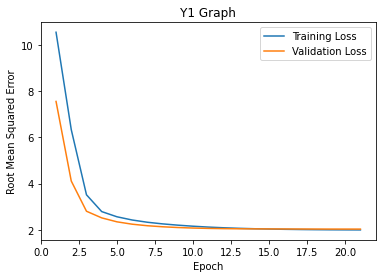


: Evaluate the new model against the test set:
25/25 [==============================] - 0s 5ms/step - loss: 4.6127 - root_mean_squared_error: 2.1477


[4.612736701965332, 2.147728204727173]

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.025
epochs = 22
batch_size = 8
label_name = 'y1'

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Build the model, this time passing in the feature_cross_feature_layer:
my_model_y1 = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse, history = train_model(my_model_y1, train_df,epochs, batch_size,
                                    label_name, validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"],
                    'Y1 Graph')

print("\n: Evaluate the new model against the test set:")
test_features = {name: np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model_y1.evaluate(x=test_features, y=test_label, batch_size=batch_size)


Epoch 1/22


72/80 [==========================>...] - ETA: 0s - loss: 308.0866 - root_mean_squared_error: 17.5524

80/80 [==============================] - 3s 15ms/step - loss: 296.5556 - root_mean_squared_error: 17.2208 - val_loss: 216.2002 - val_root_mean_squared_error: 14.7037
Epoch 2/22
80/80 [==============================] - 0s 6ms/step - loss: 164.4882 - root_mean_squared_error: 12.8253 - val_loss: 108.7211 - val_root_mean_squared_error: 10.4269
Epoch 3/22
80/80 [==============================] - 1s 7ms/step - loss: 75.1930 - root_mean_squared_error: 8.6714 - val_loss: 41.5418 - val_root_mean_squared_error: 6.4453
Epoch 4/22
80/80 [==============================] - 1s 7ms/step - loss: 25.2209 - root_mean_squared_error: 5.0220 - val_loss: 11.4137 - val_root_mean_squared_error: 3.3784
Epoch 5/22
80/80 [==============================] - 1s 7ms/step - loss: 8.3383 - root_mean_squared_error: 2.8876 - val_loss: 5.3067 - val_root_mean_squared_error: 2.3036
Epoch 6/22
80/80 [==============================] - 0s 6ms/step - loss: 5.0219 - root_mean_squared_error: 2.2410 - val_loss: 3.3231 - val_root_m

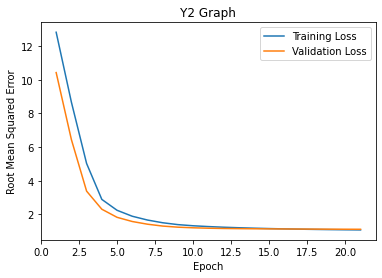


: Evaluate the new model against the test set:


25/25 [==============================] - 0s 2ms/step - loss: 1.8324 - root_mean_squared_error: 1.3537


[1.8324209451675415, 1.3536694049835205]

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.02
epochs = 22
batch_size = 8
label_name = 'y2'

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.1

# Build the model, this time passing in the feature_cross_feature_layer:
my_model_y2 = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse, history = train_model(my_model_y2, train_df,epochs, batch_size,
                                    label_name, validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"],
                    'Y2 Graph')

print("\n: Evaluate the new model against the test set:")
test_features = {name: np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model_y2.evaluate(x=test_features, y=test_label, batch_size=batch_size)

Epoch 1/30


65/72 [==========================>...] - ETA: 0s - loss: 331.5886 - root_mean_squared_error: 18.2096

72/72 [==============================] - 2s 9ms/step - loss: 330.1215 - root_mean_squared_error: 18.1692 - val_loss: 390.3120 - val_root_mean_squared_error: 19.7563
Epoch 2/30
72/72 [==============================] - 0s 4ms/step - loss: 284.4313 - root_mean_squared_error: 16.8651 - val_loss: 337.1691 - val_root_mean_squared_error: 18.3622
Epoch 3/30
72/72 [==============================] - 0s 4ms/step - loss: 244.5435 - root_mean_squared_error: 15.6379 - val_loss: 289.0577 - val_root_mean_squared_error: 17.0017
Epoch 4/30
72/72 [==============================] - 0s 3ms/step - loss: 209.0657 - root_mean_squared_error: 14.4591 - val_loss: 245.9847 - val_root_mean_squared_error: 15.6839
Epoch 5/30
72/72 [==============================] - 0s 4ms/step - loss: 177.7413 - root_mean_squared_error: 13.3320 - val_loss: 207.8158 - val_root_mean_squared_error: 14.4158
Epoch 6/30
72/72 [==============================] - 0s 3ms/step - loss: 150.3875 - root_mean_squared_error: 12.2633 - val_loss: 174

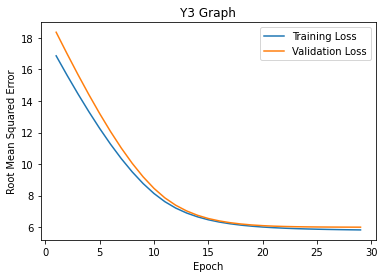


: Evaluate the new model against the test set:
25/25 [==============================] - 0s 2ms/step - loss: 33.6001 - root_mean_squared_error: 5.7966


[33.600067138671875, 5.79655647277832]

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.03
epochs = 30
batch_size = 8
label_name = 'y3'

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Build the model, this time passing in the feature_cross_feature_layer:
my_model_y3 = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse, history = train_model(my_model_y3, train_df,epochs, batch_size,
                                    label_name, validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"],
                    'Y3 Graph')

print("\n: Evaluate the new model against the test set:")
test_features = {name: np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model_y3.evaluate(x=test_features, y=test_label, batch_size=batch_size)